In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Save references to each table
Mm = Base.classes.measurement
St = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(Mm.date).order_by(Mm.date.desc()).first()

('2017-08-23',)

Query Date:  2016-08-23


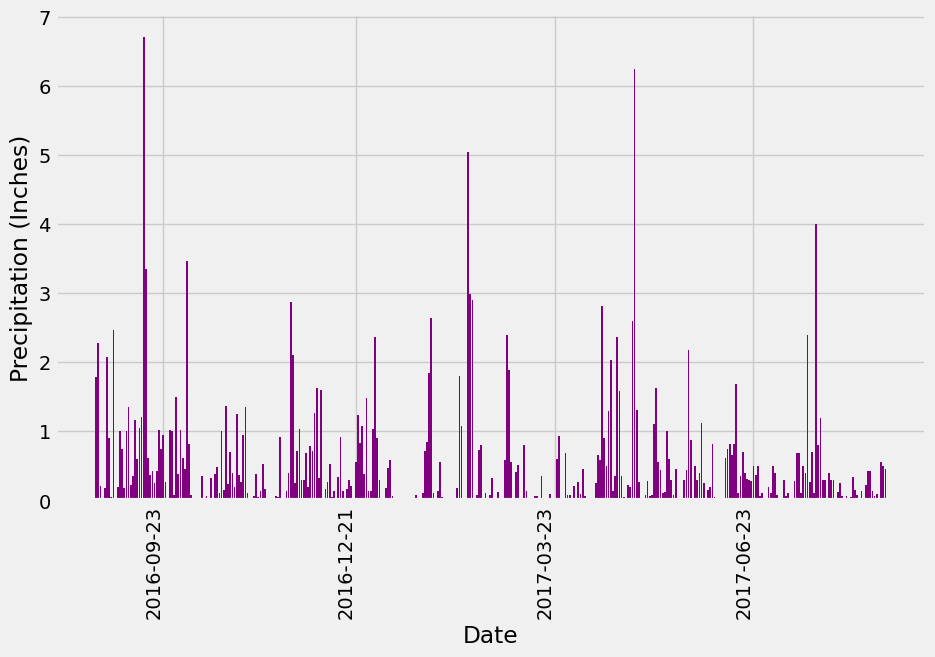

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=1*365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
Query_result =session.query(Mm.date,Mm.prcp).\
   filter(Mm.date >= '2016-08-23').\
   order_by(Mm.date).all()
#print(Query_result)
   
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(Query_result)
df.head()
Precipitation_df = df.rename(columns ={"date":"Date","prcp":"Precipitation"})
Precipitation_df.head()
# Sort the dataframe by date
Precipitation_df.sort_values(['Date']).head()

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = Precipitation_df['Date']
y_axis = Precipitation_df['Precipitation']
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x_axis,y_axis,
           color='purple')
ax.set(xlabel="Date", ylabel="Precipitation (Inches)")
      

# Define the date format
#date_form = DateFormatter("%m/%d")
#ax.xaxis.set_major_formatter(date_form)
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90, horizontalalignment='right')
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(St.station)).all()

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Mm.station,func.count()).\
    group_by(Mm.station).\
    order_by(func.count().desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Mm.tobs),
    func.max(Mm.tobs),func.avg(Mm.tobs)]
active_station = session.query(*sel).\
    filter(Mm.station == 'USC00519281').first()
active_station

(54.0, 85.0, 71.66378066378067)

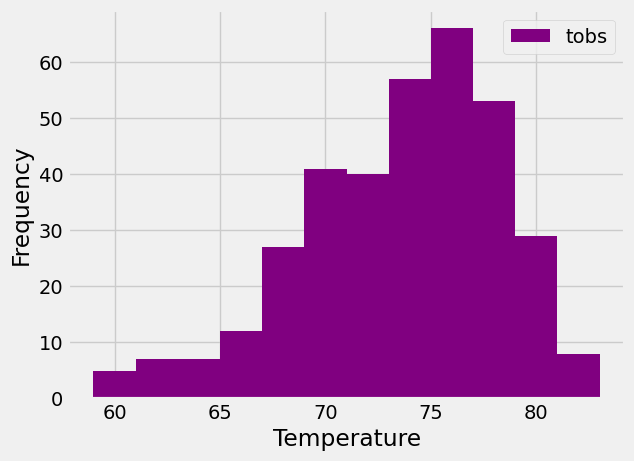

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Year_temperature = session.query( Mm.tobs).\
                   filter(Mm.station =='USC00519281').\
                   filter(Mm.date >= '2016-08-23').all()
Year_temperature
temp_df = pd.DataFrame(Year_temperature)
temp_df.head()
plt.hist(temp_df['tobs'],bins = 12, color = 'purple',label = 'tobs')
plt.xlabel('Temperature')

plt.ylabel('Frequency')
plt.hist(temp_df,bins = 12, color = 'purple')
plt.xlabel('Temperature')

plt.ylabel('Frequency')

plt.legend(loc = 'best')
plt.show()

# Close Session

In [47]:
# Close Session
session.close()